# AMPAL and structural analysis

Biomolecules in ISAMBARD are represented using the AMPAL (Atom, Monomer, Polymer, Assembly, Ligand) framework. This is a formal representation of biomolecules in a hierarchical structure of lightweight Python objects that enable you to navigate through the protein structure from the atomic level to the assembly level and vice versa. The image below shows the flow from the `Atom` to the `Assembly` level.
![AMPAL_basic](imgs/AMPAL_basic.png)

This tutorial demonstrates how AMPAL objects work, and introduces tools built into these objects for structural analysis and validation.

# 1. Importing a structure into the AMPAL framework
Firstly, import isambard into the Python environment, then load in one of the structure files provided, `3UEJ.pdb`. We'll use `nglview` to view the protein along the way so you have a visual check of what you're working with.

In [1]:
import isambard
import nglview as nv
from pprint import pprint
import ampal

_ColormakerRegistry()

In [2]:
my_pdb = ampal.load_pdb("pdbs/3UEJ.pdb")

Have a look at what you've got:

In [3]:
my_pdb

<Assembly (3UEJ) containing 2 Polypeptides, 230 Ligands>

The `.pdb` attribute lets you access the PDB formatted structure as a string. We can view this with NGLView by defining two simple functions:

In [4]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [5]:
def show_cartoon(ampal):
    view = nv.show_text(ampal.pdb)
    return view

In [6]:
show_ball_and_stick(my_pdb)

NGLWidget()

This structure contains two `Polypeptide` chains, and 230 `Ligand` objects (water, zinc and phosphate). We'll worry about the Ligand objects later, let's focus on the `Polypeptide` for now). Individual `Polypeptide`s are accessed by means of a list index:

In [7]:
my_pdb[0] # the first polypeptide in the assembly

<Polypeptide containing 65 Residues. Sequence: GSRRASVGSHRF...>

.... or by using a chain identifier as a string:

In [8]:
my_polypeptide = my_pdb['A']

The chain identifier can be accessed via the `.id` attribute

In [9]:
my_polypeptide.id

'A'

In [10]:
show_ball_and_stick(my_polypeptide)

NGLWidget()

## Navigating the AMPAL hierarchy
You can get back to the `Assembly` object via the `.parent` attribute

In [11]:
my_polypeptide.parent

<Assembly (3UEJ) containing 2 Polypeptides, 230 Ligands>

You can get a list of individual residues via the `.get_monomers()` method. This returns a Python iterator object, but if you're not comfortable using these you can move straight to a list.

In [12]:
my_residues = list(my_polypeptide.get_monomers())

Individual residues can be accessed from this list via index

In [13]:
my_residues[0]

<Residue containing 4 Atoms. Residue code: GLY>

Alternatively, you can get a residue via its index or via PDB number directly from the polypeptide object:

In [14]:
my_polypeptide[0] # The first residue in the polypeptide

<Residue containing 4 Atoms. Residue code: GLY>

In [15]:
my_polypeptide['222'] # The residue numbered 222 in the PDB file (also, the first residue!)

<Residue containing 4 Atoms. Residue code: GLY>

In [16]:
my_residue = my_polypeptide['222']

You can find more information about the residue using the `.mol_code`, `mol_letter` and `.id` attributes

In [17]:
my_residue.mol_code

'GLY'

In [18]:
my_residue.mol_letter

'G'

In [19]:
my_residue.id

'222'

You can get an ordered dictionary of atoms via the `.get_atoms()` method:

In [20]:
my_residue.get_atoms()

odict_values([<Nitrogen Atom (N). Coordinates: (16.512, 30.469, 13.471)>, <Carbon Atom (CA). Coordinates: (15.497, 29.875, 12.623)>, <Carbon Atom (C). Coordinates: (15.859, 28.430, 12.376)>, <Oxygen Atom (O). Coordinates: (16.965, 28.003, 12.672)>])

or you can access an atom directly by a dictionary look-up:

In [21]:
my_residue['CA']

<Carbon Atom (CA). Coordinates: (15.497, 29.875, 12.623)>

and its coordinates via the `.x`, `.y` and `.z` attributes

In [22]:
print (my_residue['CA'].x, my_residue['CA'].y, my_residue['CA'].z)

15.497 29.875 12.623


You can get back to the `Residue`, `Polypeptide` and `Assembly` objects using `.parent`:

In [23]:
my_atom = my_residue['CA']

In [24]:
my_atom.parent

<Residue containing 4 Atoms. Residue code: GLY>

In [25]:
my_atom.parent.parent

<Polypeptide containing 65 Residues. Sequence: GSRRASVGSHRF...>

In [26]:
my_atom.parent.parent.parent

<Assembly (3UEJ) containing 2 Polypeptides, 230 Ligands>

And you can go from the `Assembly` level right down to the `Atom` level in one step:

In [27]:
my_pdb['A']['222']['CA']

<Carbon Atom (CA). Coordinates: (15.497, 29.875, 12.623)>

## Selections and tagging

The polypeptide sequence can be accessed via the `.sequence` attribute

In [28]:
my_polypeptide.sequence

'GSRRASVGSHRFKVYNYMSPTFCDHCGSLLWGLVKQGLKCEDCGMNVHHKCREKVANLCEFIVTD'

You can select a region of structure by two methods:
* via the residue index (from the 0th to the nth residue in the polypeptide)
* via the PDB residue numbering - in this structure the residues start at 222

via residue index:

In [29]:
my_selection = my_polypeptide[0:15]

In [30]:
my_selection

<Polypeptide containing 15 Residues. Sequence: GSRRASVGSHRFKVY>

via PDB residue numbering using `.get_slice_from_res_id('start id','end id')`:

In [31]:
my_other_selection = my_polypeptide.get_slice_from_res_id('240','260')

In [32]:
my_other_selection

<Polypeptide containing 21 Residues. Sequence: SPTFCDHCGSLL...>

Let's view these in nglview:

In [33]:
show_ball_and_stick(my_other_selection)

NGLWidget()

### Select on the basis of secondary structure
This runs DSSP automatically and assigns secondary structure. You can then use the `isambard.ampal.dssp.get_ss_regions`  to access helices and strands, which are returned as `Assembly` objects.

In [52]:
isambard.ampal.dssp.tag_dssp_data(my_pdb)

In [53]:
helices=isambard.ampal.dssp.get_ss_regions(my_pdb,['H'])
strands=isambard.ampal.dssp.get_ss_regions(my_pdb,['E'])

In [54]:
helices.sequences, strands.sequences

(['HKCR', 'HKCR', 'HKCR', 'HKCR', 'HKCR'],
 ['ASVGS',
  'FKVY',
  'GLKC',
  'NV',
  'LCEFI',
  'ASVGS',
  'FKVY',
  'GLKC',
  'NV',
  'LCEFI',
  'ASVGS',
  'FKVY',
  'GLKC',
  'NV',
  'LCEFI',
  'ASVGS',
  'FKVY',
  'GLKC',
  'NV',
  'LCEFI',
  'ASVGS',
  'FKVY',
  'GLKC',
  'NV',
  'LCEFI',
  'ASVGS',
  'FKVY',
  'GLKC',
  'NV',
  'LCEFI',
  'ASVGS',
  'FKVY',
  'GLKC',
  'NV',
  'LCEFI',
  'ASVGS',
  'FKVY',
  'GLKC',
  'NV',
  'LCEFI',
  'ASVGS',
  'FKVY',
  'GLKC',
  'NV',
  'LCEFI',
  'ASVGS',
  'FKVY',
  'GLKC',
  'NV',
  'LCEFI'])

In [64]:
strands[0].sequence

'ASVGS'

In [59]:
show_cartoon(strands)

NGLWidget()

### Tagging
Once the secondary structure is assigned, each residue is 'tagged' with its secondary structure. Each level in the AMPAL hierarchy has a dictionary attached to it called 'tags', accessed via the `.tags` attribute. When `isambard.ampal.dssp.get_ss_regions` is called, each `Residue` in the AMPAL object is tagged with its secondary structure. The following code prints the tags of the first strand residue:

In [60]:
strands[0][0].tags

{'dssp_data': {'ss_definition': 'E',
  'solvent_accessibility': 41,
  'phi': -120.4,
  'psi': 145.8}}

Or, the secondary structure tags of all the residues in the selection we made earlier:

In [63]:
pprint ([x.tags['dssp_data']['ss_definition'] for x in my_selection.get_monomers()])

[' ', ' ', ' ', ' ', 'E', 'E', 'E', 'E', 'E', ' ', ' ', 'E', 'E', 'E', 'E']


There are several direct methods for tagging:

* `.tag_ca_geometry()` 
* `.tag_dssp_data()`
* `.tag_sidechain_dihedrals()`
* `.tag_torsion_angles()`

> ### Note
> Don't forget that you can see information on specific functions/classes in a number of ways:
> 1. Check the [API documentation](https://woolfson-group.github.io/isambard/api_reference.html)
> 1. Take a look at the [source code](https://github.com/woolfson-group/isambard/tree/master/isambard)
> 1. Shift+Tab inside the round brackets if you're using Jupyter Notebook
> 1. Use the Python `help` function e.g. `help(isambard.ampal.convert_pdb_to_ampal)`

### A rudimentary Ramachandran plot:

In [40]:
my_polypeptide.tag_torsion_angles()

In [41]:
phi = [x.tags['phi'] for x in my_polypeptide]
psi = [x.tags['psi'] for x in my_polypeptide]    

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

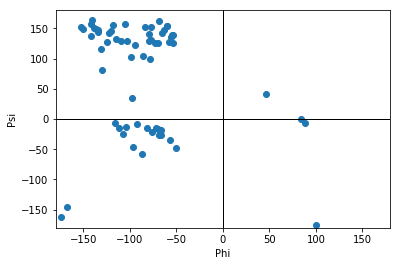

In [43]:
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.scatter(phi,psi)
plt.xlabel("Phi")
plt.ylabel("Psi")
plt.xlim(-180, 180)
plt.ylim(-180, 180)
None

You can use your own tags:

In [44]:
for x in my_selection:
    x.tags['my_tag'] = 'My Value'

In [45]:
print ([x.tags['my_tag'] for x in my_selection])

['My Value', 'My Value', 'My Value', 'My Value', 'My Value', 'My Value', 'My Value', 'My Value', 'My Value', 'My Value', 'My Value', 'My Value', 'My Value', 'My Value', 'My Value']


## Dealing with ligands
Ligands can be accessed via the `.ligands` attribute at the `Polypeptide` level, or the `.get_ligands()` method at the `Assembly` level. We'll just work with the `Polypeptide`.

In [46]:
my_ligands = my_polypeptide.ligands

In [47]:
pprint ([x.mol_code for x in my_ligands])

['ZN',
 'ZN',
 'PO4',
 'PO4',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH',
 'HOH']


As you can see, most of these are for water, but there are two zinc atoms which are of interest.

In [48]:
my_zinc1 = my_ligands[0]

In [49]:
my_zinc1

<Ligand containing 1 Atom. Ligand code: ZN>

We can look at the environment surrounding the zinc ions at a defined distance cutoff:

In [50]:
my_zinc1.close_monomers(my_pdb, cutoff=4.0)

[<Residue containing 6 Atoms. Residue code: CYS>,
 <Residue containing 6 Atoms. Residue code: CYS>,
 <Residue containing 10 Atoms. Residue code: HIS>,
 <Residue containing 6 Atoms. Residue code: CYS>,
 <Ligand containing 1 Atom. Ligand code: ZN>]

### To view these in NGLView, we need to make a dummy `Assembly` object for isambard:

In [51]:
my_zinc_env = my_zinc1.close_monomers(my_pdb, cutoff=4.0)

In [52]:
my_zinc_assembly = isambard.ampal.Assembly()
for x in my_zinc_env:
    my_zinc_assembly.append(isambard.ampal.Polymer(x))

In [53]:
show_ball_and_stick(my_zinc_assembly)

NGLWidget()

## Scaling it up
All this is very well, but nothing you can't do in PyMOL or similar with ease and a few clicks. We are now going to work with a much larger set of structures taken from the PDB to do some analysis - something which is harder to do over a large set of structures in a GUI-style environment.

### RCSB (`http://rcsb.org`) query:

We queried the RCSB to get a set of x-ray crystal structures of proteins with zinc ligands. This returned 84 structures which are included as part of the tutorial, along with one NMR structure we added to demonstrate the `AmpalContainer` class. The RCSB PDB query is below if you would like to repeat it.

_`Ligand Search` : Has free ligands=yes and Chemical Name: Name Contains zinc and Polymeric type is Any and Sequence Length is between 40 and 100 and Holdings : Molecule Type=protein Experimental Method=X-RAY and Resolution is 1.499 or less_ 

* returned 84 structures + one added NMR structure
* all files in a list called `pdb_list` in your working directory

### Read in the list and get all structures into the Ampal framework

In [65]:
with open('pdb_list','r') as in_list:
    structures = [x.rstrip() for x in in_list.readlines()]

In [66]:
my_structures = []
for s in structures:
    try:
        m = ampal.load_pdb(s)
        my_structures.append(m)
    except:
        FileNotFoundError()

## AmpalContainer
AmpalContainer is one level above an Assembly, and allows for multiple-model structures such as NMR ensembles. Use the code below to find which of the structures is the multi-model NMR structure. We'll just take the first model for this structure.
![AMPAL_Container](imgs/AMPAL_inheritance_incl_ampal_container.png)

In [67]:
my_ampal_structures = []
for m in my_structures:
    if isinstance(m,isambard.ampal.AmpalContainer):
        print("{} is the NMR structure".format(m.id))
        print("Taking 1st model only")
        first_structure = m[0]
        my_ampal_structures.append(first_structure)
    else:
        my_ampal_structures.append(m)

5N7Y is the NMR structure
Taking 1st model only


Now let's write some code to identify where the zinc ions are in each structure, and pull out their environment.

In [68]:
my_zn_envs = []
for structure in my_ampal_structures:
    print ("Examining {}".format(structure.id))
    ligs = structure.get_ligands()
    
    for n in ligs:
        if n.mol_code == "ZN":
            print ("{} ZN here".format(structure.id))
            zn_env = n.close_monomers(structure, cutoff=4.0)
            my_zn_envs.append(zn_env)

Examining 1CY5
1CY5 ZN here
1CY5 ZN here
1CY5 ZN here
1CY5 ZN here
1CY5 ZN here
Examining 1I27
1I27 ZN here
Examining 1IRN
1IRN ZN here
Examining 1L0I
1L0I ZN here
1L0I ZN here
1L0I ZN here
1L0I ZN here
1L0I ZN here
1L0I ZN here
1L0I ZN here
Examining 1Q7L
1Q7L ZN here
1Q7L ZN here
1Q7L ZN here
1Q7L ZN here
Examining 1QX2
1QX2 ZN here
1QX2 ZN here
Examining 1RYQ
1RYQ ZN here
Examining 1T8K
1T8K ZN here
1T8K ZN here
1T8K ZN here
1T8K ZN here
1T8K ZN here
1T8K ZN here
1T8K ZN here
1T8K ZN here
1T8K ZN here
1T8K ZN here
Examining 1VFY
1VFY ZN here
1VFY ZN here
Examining 2CB8
2CB8 ZN here
2CB8 ZN here
2CB8 ZN here
2CB8 ZN here
2CB8 ZN here
2CB8 ZN here
2CB8 ZN here
2CB8 ZN here
Examining 2CS7
2CS7 ZN here
2CS7 ZN here
2CS7 ZN here
Examining 2EHS
2EHS ZN here
2EHS ZN here
2EHS ZN here
2EHS ZN here
2EHS ZN here
2EHS ZN here
2EHS ZN here
Examining 2EHT
2EHT ZN here
2EHT ZN here
2EHT ZN here
2EHT ZN here
2EHT ZN here
2EHT ZN here
2EHT ZN here
Examining 2HBA
2HBA ZN here
2HBA ZN here
2HBA ZN he

## Analysis
Can you use the isambard code you've learnt so far together with a bit of python to analyse these zinc binding sites?

Hints: you could use a dictionary to keep track of amino acid counts, or you could keep a tally of distances in a list.

Which amino acid residues are typically closest to the zinc ions?

Sample code to use below if you don't have any ideas.

### Sequence analysis

In [69]:
my_amino_acid_count = {}
my_amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

for x in list(my_amino_acids):
    my_amino_acid_count[x] = 0

for env in my_zn_envs:
    for residue in env:
        if type(residue) is isambard.ampal.Residue:
            my_amino_acid_count[residue.mol_letter] += 1

In [70]:
my_amino_acid_count

{'A': 5,
 'C': 381,
 'D': 65,
 'E': 94,
 'F': 1,
 'G': 6,
 'H': 124,
 'I': 13,
 'K': 13,
 'L': 13,
 'M': 3,
 'N': 5,
 'P': 2,
 'Q': 5,
 'R': 9,
 'S': 4,
 'T': 5,
 'V': 22,
 'W': 1,
 'Y': 15}

### Can you work out the mean distance from each zinc atom to its binding residues? 
Hint: there is a function `ampal.geometry.distance()` which takes two atom objects as arguments and returns the distance between them.

In [60]:
my_zn_envs

[[<Residue containing 9 Atoms. Residue code: GLU>,
  <Residue containing 9 Atoms. Residue code: GLN>,
  <Ligand containing 1 Atom. Ligand code: ZN>,
  <Ligand containing 1 Atom. Ligand code: HOH>,
  <Ligand containing 1 Atom. Ligand code: HOH>],
 [<Residue containing 8 Atoms. Residue code: ASP>,
  <Residue containing 8 Atoms. Residue code: ILE>,
  <Residue containing 9 Atoms. Residue code: GLU>,
  <Ligand containing 1 Atom. Ligand code: ZN>,
  <Ligand containing 1 Atom. Ligand code: HOH>,
  <Ligand containing 1 Atom. Ligand code: HOH>,
  <Ligand containing 1 Atom. Ligand code: HOH>,
  <Ligand containing 1 Atom. Ligand code: HOH>],
 [<Residue containing 10 Atoms. Residue code: HIS>,
  <Residue containing 8 Atoms. Residue code: ASP>,
  <Ligand containing 1 Atom. Ligand code: ZN>,
  <Ligand containing 1 Atom. Ligand code: HOH>,
  <Ligand containing 1 Atom. Ligand code: HOH>,
  <Ligand containing 1 Atom. Ligand code: HOH>],
 [<Residue containing 9 Atoms. Residue code: GLU>,
  <Ligand conta

In [61]:
my_distances = {}
for x in list(my_amino_acids):
    my_distances[x] = []
    
for env in my_zn_envs:
    my_zinc = None
    for residue in env:
        if residue.mol_code == "ZN":
            my_zinc = residue
    
    for residue in env:
        if type(residue) is ampal.protein.Residue:
            my_distance = ampal.geometry.distance(my_zinc['ZN'],residue['CA'])
            my_distances[residue.mol_letter].append(my_distance)

### Find the average distance for the cysteine residues

In [62]:
import numpy as np
cys_array = np.array(my_distances['C'])
np.mean(cys_array)

4.372483100093973

In [63]:
np.std(cys_array)

0.2911497188993581

## Phenylalanine?
One of the zinc binding sites has a phenylalanine residue close by. Find it, and see if you can work out what role the phenylalanine might be playing, if any.

In [64]:
for env in my_zn_envs:
    for residue in env:
        if residue.mol_code == "PHE":
            my_phe_assembly = isambard.ampal.Polypeptide(env)
            print ("PDB code is {}".format(residue.parent.parent.id))
            print ("Chain ID is {}".format(residue.parent.id))
            print ("Residue number is {}".format(residue.id))
            
            for residue in env:
                if residue.mol_code == "ZN":
                    print ("Zinc is {} {}".format(residue.id, residue.parent.id))

PDB code is 4L7X
Chain ID is A
Residue number is 30
Zinc is 101 A


In [65]:
view = nv.show_file("pdbs/4L7X.pdb")
view.add_representation('spacefill',selection="101:A",color='green')
view.add_ball_and_stick("{}:{}".format(" or ".join([str(x.id) for x in my_phe_assembly]),'A'))
view

NGLWidget()

## Summary
You should now be able to:

+ import PDB structures into the AMPAL framework
+ query structures by secondary structure and residue identity
+ tag AMPAL objects 
+ look at the environment around certain atoms
+ calculate distances between atoms